964.99	1074.06	1189.85	1262.06	1445.49

Coefficients:[[2.565]], intercept -4948.88
Residual sum of squares: 0.10
Score: 0.99


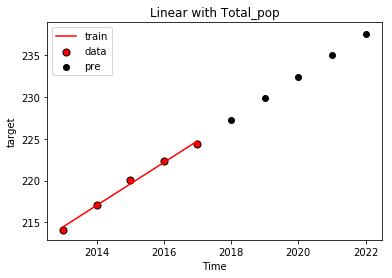

In [99]:
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as ps

rng = np.random.RandomState(0)
# # Generate sample data

X = [[2013],[2014],[2015],[2016],[2017]]

def testXy(X,y):
    X = np.asarray(X)
    y = np.asarray(y)

#     print(type(X))
#     print(X.shape)

    regr = linear_model.LinearRegression()
    regr.fit(X, y)
    X_pre = [[2018],[2019],[2020],[2021],[2022]]
    y_pre = regr.predict(X_pre)

    y_train = regr.predict(X)
#     print(y_pre)
    print('Coefficients:%s, intercept %.2f'%(regr.coef_,regr.intercept_))
    print("Residual sum of squares: %.2f"% np.mean((regr.predict(X) - y) ** 2))
    print('Score: %.2f' % regr.score(X, y))

    plt.scatter(X, y, c='r', s=50, label='data',
                zorder=2, edgecolors=(0, 0, 0))
    plt.scatter(X_pre,y_pre, c='k', label='pre', zorder=1,
                edgecolors=(0, 0, 0))
    plt.plot(X, y_train, c='r',label='train')
    plt.xlabel('Time')
    plt.ylabel('target')
    plt.title('Linear with Total_pop')
    plt.legend()
    plt.show()
    
y = [[214.13],[217.11],[220.07],[222.3],[224.36]]
testXy(X,y)

年末人口(万)
Coefficients:[[2.565]], intercept -4948.88
Residual sum of squares: 0.10
Score: 0.99


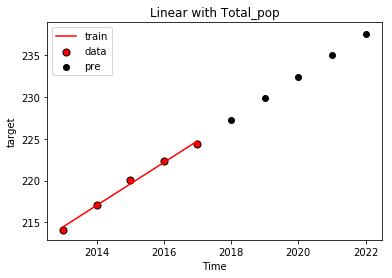

人均可支配收入(城镇)
Coefficients:[[2096.]], intercept -4196914.00
Residual sum of squares: 2431.20
Score: 1.00


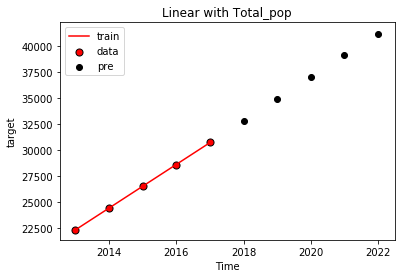

人均可支配收入(农村)
Coefficients:[[929.6]], intercept -1862405.40
Residual sum of squares: 4851.92
Score: 1.00


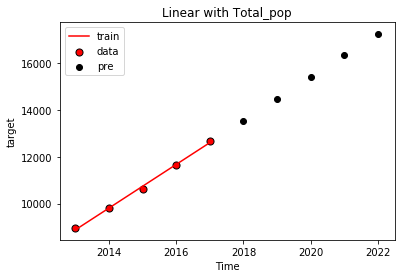

商品房销售面积(平方米)
Coefficients:[[298996.1]], intercept -599495669.90
Residual sum of squares: 284339661025.84
Score: 0.39


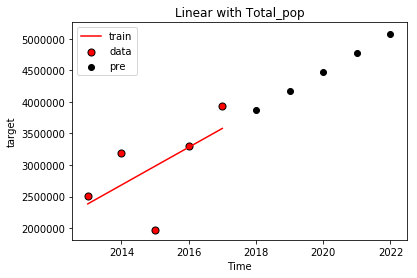

房地产开发投资总额(万元)
Coefficients:[[951080.4]], intercept -1912950175.40
Residual sum of squares: 61471507317.11
Score: 0.97


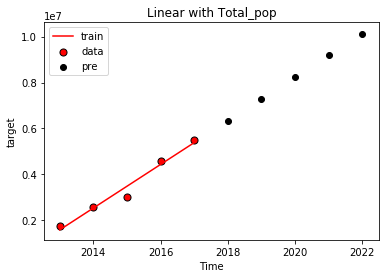

居民消费价格指数
Coefficients:[[-0.23]], intercept 565.97
Residual sum of squares: 0.46
Score: 0.19


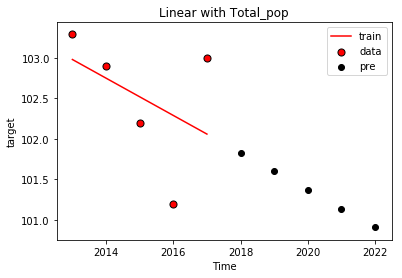

生产总值(亿元)
Coefficients:[[113.082]], intercept -226813.06
Residual sum of squares: 619.34
Score: 0.98


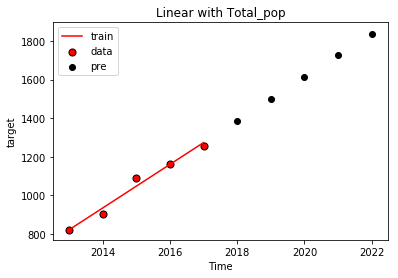

储蓄存款余额(亿元)
Coefficients:[[114.9]], intercept -230336.21
Residual sum of squares: 496.51
Score: 0.98


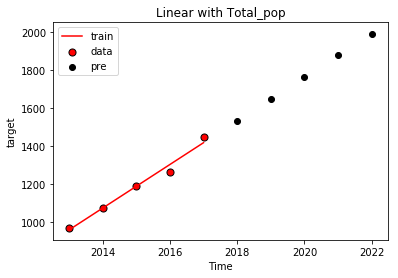

In [105]:
# X2 = [[964.99],[1074.06],[1189.85],[1262.06],[1445.49]]
# testXy(X2,y)

path = "//home/font/Data/MM/neepu/"
filename_haikou_test = 'haikoutest.csv'
data_haikou_test = pd.read_csv((path+filename_haikou_test),index_col='Time')
np.asarray(data_haikou_test.iloc[1,:]).reshape(5,1)

for i in range(len(data_haikou_test.index)-1):
    print(list(data_haikou_test.index)[i])
    testXy(X,np.asarray(data_haikou_test.iloc[i,:]).reshape(5,1))

In [108]:
X = np.linspace(2013,2018,61).reshape(61,1)
# print(X.shape)
# print(X[::5])
rng = np.random.RandomState(1)

random_array = 12.56 * (0.5 - rng.rand(31)).reshape(31,1)
print(random_array)
X = X.reshape(61,1)
y = X * 114.9 + -230336.21
y[::2] += random_array
X_test = np.linspace(2018,2020,25).reshape(25,1)
print(type(X))
print(X.shape)
print(type(y))
print(y.shape)

[[ 1.04220362]
 [-2.76727564]
 [ 6.27856345]
 [ 2.48270289]
 [ 4.43674601]
 [ 5.12022725]
 [ 3.94057175]
 [ 1.93975727]
 [ 1.29660052]
 [-0.48753818]
 [ 1.0149169 ]
 [-2.32635692]
 [ 3.71207974]
 [-4.749155  ]
 [ 5.93601183]
 [-2.14107193]
 [ 1.03865168]
 [-0.73714425]
 [ 4.51674005]
 [ 3.7918453 ]
 [-3.77735178]
 [-5.88136539]
 [ 2.34339232]
 [-2.41557205]
 [-4.72744775]
 [-4.95625969]
 [ 5.21184471]
 [ 5.78947192]
 [ 4.14692993]
 [-4.74946984]
 [ 5.04476377]]
<class 'numpy.ndarray'>
(61, 1)
<class 'numpy.ndarray'>
(61, 1)


[[1531.90089001 1541.45687158 1551.01285315 1560.56883472 1570.1248163
  1579.68079787 1589.23677944 1598.79276101 1608.34874259 1617.90472416
  1627.46070573 1637.01668731 1646.57266888 1656.12865045 1665.68463202
  1675.2406136  1684.79659517 1694.35257674 1703.90855831 1713.46453989
  1723.02052146 1732.57650303 1742.1324846  1751.68846618 1761.24444775]]


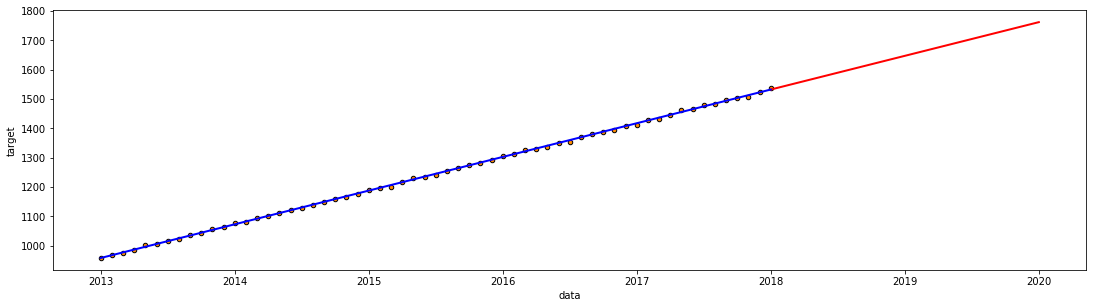

Residual sum of squares: 7.42
Score-R2: 1.00


In [111]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# Create a random dataset
# rng = np.random.RandomState(1)
# X = np.sort(10 * rng.rand(160, 1), axis=0)
# y = np.sin(X).ravel()
# y[::5] += 0.5 * (0.5 - rng.rand(int(len(X)/5))) # 每五个点增加一次噪音

# Fit regression model

def plot_AdaBoost(X,y,X_test):
    regr = linear_model.LinearRegression()
    regr.fit(X, y)

    # Predict
#     X_test = np.arange(0.0, 10.0, 0.01)[:, np.newaxis]
#     y_test = np.sin(X_test).ravel()
#     y_test[::5] += 2 * (0.5 - rng.rand(int(len(X_test)/5))) # 每五个点增加一次噪音
    y_3 = regr.predict(X_test)
#     print(X_test)
    print(y_3.reshape(1,25))
    y_train = regr.predict(X)
#     print(y_train.shape)
    y_train = y_train.reshape(61,1)

    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)

    ax = fig.add_subplot(2, 1, 1)
    plt.scatter(X, y, s=20, edgecolor="black",
                c="darkorange", label="data")
    ax.plot(X_test, y_3, color="r", label="Test", linewidth=2)
    ax.plot(X, y_train, color="blue", label="Train", linewidth=2)
    ax.set_xlabel("data")
    ax.set_ylabel("target")

    plt.show()

    print("Residual sum of squares: %.2f"% np.mean((y - y_train) ** 2))
    print('Score-R2: %.2f' % regr.score(X, y_train))

plot_AdaBoost(X,y,X_test)

In [28]:
X_test = np.arange(0.0, 10.0, 0.01)[:, np.newaxis]
print(X_test.shape)
y_test = np.sin(X_test).ravel()
y_test[::5] += 2 * (0.5 - rng.rand(int(len(X_test)/5))) # 每五个点增加一次噪音
print(y_test.shape)

(1000, 1)
(1000,)
